# Helping Elevate Resort to solve Business problems

**==========================================================================================================**

**==========================================================================================================**

## Import Libraries

In [1]:
import numpy as np
#from numpy import count_nonzero, median, mean
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify

import datetime
from datetime import datetime, timedelta, date


#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)
#sns.set(rc={'figure.figsize':(14,10)})

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


**==========================================================================================================**

## Import Data

In [2]:
df = pd.read_csv("hotel_bookings.csv")

**==========================================================================================================**

## Data Quick Glance

In [3]:
df.head()

,Booking ID,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_month_code,arrival_date_week_number,arrival_date_day_of_month,Date,stays_in_weekend_nights,stays_in_week_nights,length of stay,adults,children,babies,meal,Country Code,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_cancelled
0,14039,Resort Hotel,342,2015,July,7,27,1,7/1/2015,0,0,0,2,0,0,BB,PRT,Direct,0,D,D,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,0
1,14038,Resort Hotel,737,2015,July,7,27,1,7/1/2015,0,0,0,2,0,0,BB,PRT,Direct,0,D,D,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,0
2,48516,Resort Hotel,7,2015,July,7,27,1,7/1/2015,0,1,1,1,0,0,BB,GBR,Direct,0,I,D,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,0
3,27243,Resort Hotel,13,2015,July,7,27,1,7/1/2015,0,1,1,1,0,0,BB,GBR,Corporate,0,I,I,0,No Deposit,304.00,0,Transient,75.00,0,0,Check-Out,0
4,101346,Resort Hotel,14,2015,July,7,27,1,7/1/2015,0,2,2,2,0,0,BB,GBR,Online TA,0,I,I,0,No Deposit,240.00,0,Transient,98.00,0,1,Check-Out,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118987 entries, 0 to 118986
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Booking ID                   118987 non-null  int64  
 1   hotel                        118987 non-null  object 
 2   lead_time                    118987 non-null  int64  
 3   arrival_date_year            118987 non-null  int64  
 4   arrival_date_month           118987 non-null  object 
 5   arrival_month_code           118987 non-null  int64  
 6   arrival_date_week_number     118987 non-null  int64  
 7   arrival_date_day_of_month    118987 non-null  int64  
 8   Date                         118987 non-null  object 
 9   stays_in_weekend_nights      118987 non-null  int64  
 10  stays_in_week_nights         118987 non-null  int64  
 11  length of stay               118987 non-null  int64  
 12  adults                       118987 non-null  int64  
 13 

In [5]:
df.dtypes.value_counts()

int64      18
object     11
float64     2
dtype: int64

In [ ]:
# Descriptive Statistical Analysis
df.describe(include="all")

In [ ]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

In [ ]:
# Descriptive Statistical Analysis
df.describe(include="object")

In [ ]:
df.columns

In [ ]:
df.shape

In [6]:
df.isnull().sum()

Booking ID                         0
hotel                              0
lead_time                          0
arrival_date_year                  0
arrival_date_month                 0
arrival_month_code                 0
arrival_date_week_number           0
arrival_date_day_of_month          0
Date                               0
stays_in_weekend_nights            0
stays_in_week_nights               0
length of stay                     0
adults                             0
children                           0
babies                             0
meal                               0
Country Code                     478
market_segment                     0
is_repeated_guest                  0
reserved_room_type                 0
assigned_room_type                 0
booking_changes                    0
deposit_type                       0
agent                          16263
days_in_waiting_list               0
customer_type                      0
adr                                0
r

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.duplicated().sum()

Elevate Resort wants to analyze the distribution of bookings(Booking ID) across different room types(reserved_room_type).  Which of the below visualization types should they use to visualize this information?

In [11]:
df.groupby("reserved_room_type")["Booking ID"].count()

reserved_room_type
A    84079
B     1029
C      921
D    18641
E     6518
F     2813
G     2598
H      559
I     1826
L        3
Name: Booking ID, dtype: int64

Question 2

Visualize the distribution of bookings(Booking ID) across different room types(reserved_room_type) in Power BI. Which of the below room types had the highest number of bookings?

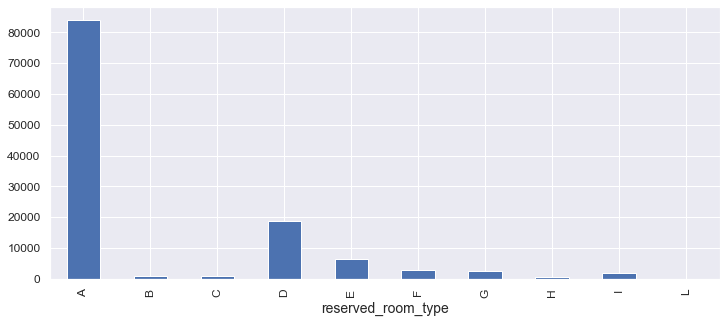

In [13]:
df.groupby("reserved_room_type")["Booking ID"].count().plot(kind = "bar", figsize = (12,5), fontsize = 12)
plt.show()

Using Power BI, find out which is the most popular room assigned to people who have booked a room with Elevate resorts. Also, find the percentage of the most popular room assigned(assigned_room_type).

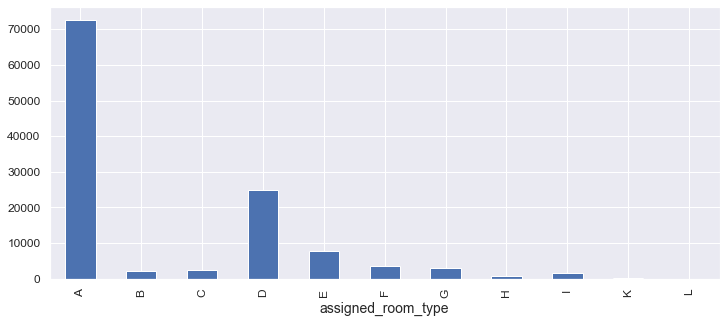

In [16]:
df.groupby("assigned_room_type")["hotel"].count().plot(kind = "bar", figsize = (12,5), fontsize = 12)
plt.show()

In [20]:
assigned = df.groupby("assigned_room_type")["hotel"].count()
assigned

assigned_room_type
A    72625
B     2110
C     2329
D    24800
E     7798
F     3604
G     3112
H      668
I     1753
K      187
L        1
Name: hotel, dtype: int64

In [21]:
72625/118987 * 100

61.03607957171791

Question 4

The marketing team at the Elevator Resort wants to analyze the booking trends(Booking ID) across market segments(market_segment). They need to visualize the booking volumes for each market segment over the years (Date column) Help them by providing the solutions to the below questions.

Which market segment consistently has the highest booking volumes over the years?

In [24]:
df.arrival_date_year

0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
118982    2017
118983    2017
118984    2017
118985    2017
118986    2017
Name: arrival_date_year, Length: 118987, dtype: int64

In [26]:
df.groupby(["market_segment","arrival_date_year"])["Booking ID"].count()

market_segment  arrival_date_year
Aviation        2016                   127
                2017                   108
Complementary   2015                   162
                2016                   355
                2017                   207
Corporate       2015                  1167
                2016                  2557
                2017                  1558
Direct          2015                  2305
                2016                  5635
                2017                  4613
Groups          2015                  6092
                2016                  7853
                2017                  5846
Offline TA/TO   2015                  6072
                2016                 12449
                2017                  5658
Online TA       2015                  6152
                2016                 27502
                2017                 22567
Undefined       2015                     2
Name: Booking ID, dtype: int64

Question 5

Between Groups and Direct market segments(market_segments) which has the most number of bookings in the year 2016? (Hint - Use “arrival_date_year” column to get the answer by year) 

In [28]:
df.groupby(["market_segment","arrival_date_year"])["Booking ID"].count()

market_segment  arrival_date_year
Aviation        2016                   127
                2017                   108
Complementary   2015                   162
                2016                   355
                2017                   207
Corporate       2015                  1167
                2016                  2557
                2017                  1558
Direct          2015                  2305
                2016                  5635
                2017                  4613
Groups          2015                  6092
                2016                  7853
                2017                  5846
Offline TA/TO   2015                  6072
                2016                 12449
                2017                  5658
Online TA       2015                  6152
                2016                 27502
                2017                 22567
Undefined       2015                     2
Name: Booking ID, dtype: int64

Elevate Resort wants to analyze the cancellation pattern(is_cancelled) across all the months(arrival_month_code) of 2016.  They want to know in which month of 2016 did they get the most number of cancellations. Visualize this in Power BI and select the right answer.  (Hint - Use “arrival_date_year” column to get answer by year)

In [36]:
df.groupby(["is_cancelled","arrival_date_month","arrival_date_year"])["arrival_month_code"].sum()

is_cancelled  arrival_date_month  arrival_date_year
0             April               2016                 16332
                                  2017                 15324
              August              2015                 22000
                                  2016                 27360
                                  2017                 25344
              December            2015                 27996
                                  2016                 31644
              February            2016                  5894
                                  2017                  6124
              January             2016                  1855
                                  2017                  2750
              July                2015                 11907
                                  2016                 22932
                                  2017                 24150
              June                2016                 24048
                                 

Elevate Resorts plans to maintain and prepare the parking area to meet the parking requirements month on month(arrival_month_code). Which month in 2016 saw the maximum number of cars being parked(required_car_parking_spaces)? (Hint - Use “arrival_date_year” column to get answer by year) 

In [41]:
df.groupby(["arrival_date_year","arrival_month_code"])["required_car_parking_spaces"].sum()

arrival_date_year  arrival_month_code
2015               7                     216
                   8                     248
                   9                     215
                   10                    250
                   11                    192
                   12                    231
2016               1                     209
                   2                     267
                   3                     356
                   4                     318
                   5                     334
                   6                     314
                   7                     376
                   8                     451
                   9                     332
                   10                    380
                   11                    264
                   12                    270
2017               1                     281
                   2                     242
                   3                     244
                 

**==========================================================================================================**

`
sns.FacetGrid(data,  row=None,  col=None,  hue=None,  col_wrap=None,
    sharex=True, sharey=True,  height=3,  aspect=1,  palette=None,  row_order=None,  col_order=None,
    hue_order=None,  hue_kws=None,  dropna=False, legend_out=True,  despine=True,
    margin_titles=False,  xlim=None,  ylim=None,  subplot_kws=None,  gridspec_kws=None, size=None)
`

In [ ]:
sns.FacetGrid(data=df, col="label")

In [ ]:
g = sns.FacetGrid(data=df, col="label", height=3, aspect=1)

g.map(sns.boxplot, "drives")

g.fig.suptitle("My super title", y=1.05)


plt.show()

In [ ]:
g = sns.FacetGrid(data=df, col="gender", hue=None, col_wrap=None, height=3, aspect=2, margin_titles=True)
g.map(sns.histplot, "age")
g.add_legend()
plt.show()

In [ ]:
g = sns.FacetGrid(data=df, col="merchantstate", hue=None, col_wrap=4, height=3, aspect=2, margin_titles=True)
g.map(sns.kdeplot, "amount", color="green")
g.add_legend()
plt.show()

In [ ]:
g = sns.FacetGrid(data=df, col="merchantstate", row="gender", hue=None, col_wrap=None, height=3, aspect=2, margin_titles=True)
g.map(sns.regplot, "balance", "amount", color="red", fit_reg=True, x_jitter=None)
g.add_legend()
plt.show()

In [ ]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"])
g.add_legend()
plt.show()

In [ ]:
g = sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", order=[1, 2, 3], color=".3", errorbar=None)

In [ ]:
g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=2.5)
g.map(sns.scatterplot, "total_bill", "tip", color="#334488")
g.set_axis_labels("Total bill (US Dollars)", "Tip")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.figure.subplots_adjust(wspace=.02, hspace=.02)

**==========================================================================================================**

In [ ]:
df.columns

In [ ]:
df_year = df.groupby(["year"], as_index=False).mean()
df_year.head()

In [ ]:
df_year["pop"] = df_year["population"]/1000000

In [ ]:
df_year["gdpnorm"] = df_year["gdp"]/100000000

In [ ]:
df2 = df_year[['infant_mortality', 'life_expectancy', 'fertility','pop', 'gdpnorm']]
df2.head()

**==========================================================================================================**

## Histogram

### Pandas Version

In [ ]:
df.hist(bins=50, figsize=(20,80), layout=(len(df.columns),2), grid=False)
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
df_year.plot.hist(figsize=(10, 10), subplots=True)
plt.show()

In [ ]:
df2.plot.hist(figsize=(10, 10), bins=20, subplots=False, stacked = True, orientation = 'horizontal')
plt.show()

In [ ]:
df.year.plot(kind = "hist", figsize = (12,5), fontsize = 15, bins = 80, density = True)
plt.show()

In [ ]:
df.duration.hist(figsize = (12,8), bins = 80, xlabelsize=15, ylabelsize= 15, cumulative = True)
plt.show()

In [ ]:
df.amount.plot.hist(figsize = (12,8))
plt.show()

In [ ]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, sharey=False, figsize=(20,15))
fig.suptitle('Main Title', y=1.0, size = 20)

df.plot.hist(y="age", bins=10, color='darkblue', ax=ax1)
ax1.set_title("Title")
ax1.set(xlabel="x", ylabel="y")


df.plot.hist(y="balance", bins=10, ax=ax2)
ax2.set_title("Title")
ax2.set(xlabel="x", ylabel="y")

df.plot.hist(y="amount", bins=10, ax=ax3)
ax3.set_title("Title")
ax3.set(xlabel="x", ylabel="y")

df.plot.hist(y="age", bins=10, ax=ax4)
ax4.set_title("Title")
ax4.set(xlabel="x", ylabel="y")

plt.tight_layout()
plt.show()

### Matplotlib Version

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(x=df.amount, bins = 10, density=False, cumulative=False, color=None)
plt.show()

In [ ]:
# plt.subplot(2,2,1)
# plt.subplot(2,2,2)
# plt.subplot(2,2,3)
# plt.subplot(2,2,4)
# plt.show()
# plt.tight_layout()

### Seaborn Version

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x=df.amount, data=df, bins=10)

plt.show()

In [ ]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, sharey=False, figsize=(20,15))
fig.suptitle('Main Title', y=1.0, size = 20)

sns.histplot(data=df, x=df.age, y=None, hue=None, ax=ax1)
ax1.set_title("Title")
ax1.set(xlabel="x", ylabel="y")


sns.histplot(data=df, x=df.age, y=None, hue=None, ax=ax2)
ax2.set_title("Title")
ax2.set(xlabel="x", ylabel="y")

sns.histplot(data=df, x=df.age, y=None, hue=None, ax=ax3)
ax3.set_title("Title")
ax3.set(xlabel="x", ylabel="y")

sns.histplot(data=df, x=df.age, y=None, hue=None, ax=ax4)
ax4.set_title("Title")
ax4.set(xlabel="x", ylabel="y")

plt.tight_layout()
plt.show()

In [ ]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

**==========================================================================================================**

## Bar Plots

### Pandas Version

In [ ]:
df_year["infant_mortality"].plot(kind = "bar", figsize=(12,8))
#df_year["infant_mortaility"].plot.bar()
plt.show()

In [ ]:
df_year.plot(x="year", y="fertility", kind ="bar", figsize=(12,8))
plt.show()

In [ ]:
df2.plot.bar(stacked = True, figsize=(12,8))
plt.show()

In [ ]:
df2.plot.barh(stacked = True, figsize=(12,8))
plt.show()

### Matplotlib Version

In [ ]:
df.columns

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x=df.txn_description, height=df.balance)
ax.set(title="title", xlabel="x", ylabel="y")

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(y=df.txn_description, width=df.balance)
ax.set(title="title", xlabel="x", ylabel="y")
ax.set_xlabel('xlabel', fontsize=15)
ax.set_ylabel('ylabel', fontsize=15)

plt.show()

### Seaborn Version

In [ ]:
df.head(1)

In [ ]:
sns.catplot(x="txndescription", y="amount", kind='bar', data=df, hue ='gender', aspect=2, height=6)
plt.show()

In [ ]:
sns.catplot(x="txndescription", y="amount", kind='bar', data=df, hue ='gender', aspect=2, height=6, palette="viridis")
plt.show()

In [ ]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(4,1, sharex=False, figsize=(16,16))
fig.suptitle('Main Title', y=1.0)


sns.barplot(x="txndescription", y="amount", hue=None, ci=95, data=df, orient=None, ax=ax[0])
ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("")
ax[0].set_ylabel("")

sns.barplot(x="gender", y="amount", hue=None, ci=95, data=df, orient=None, ax=ax[1])
ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("")
ax[1].set_ylabel("")

sns.barplot(x="merchantstate", y="amount", hue=None, ci=95, data=df, orient=None, ax=ax[2])
ax[2].set_title('Title of the third chart')
#ax[2].tick_params('x', labelrotation=45)
ax[2].set_xlabel("")
ax[2].set_ylabel("")

sns.barplot(x="movement", y="amount", hue=None, ci=95, data=df, ax=ax[3])
ax[3].set_title('Title of the fourth chart')
#ax[3].tick_params('x', labelrotation=45)
ax[3].set_xlabel("")
ax[3].set_ylabel("")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Sort Barplots by Values and Single Plot

fig = plt.figure(figsize=(20,10))


sns.barplot(x=None, y=df.vendorid2, data=df,
            order=df.sort_values('vendorid2', ascending=False).index)
plt.title("", size=20)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

## Side by Side Bar Plots

In [ ]:
df4 = pd.melt(df3, id_vars="cardID")
df4

In [ ]:
plt.figure(figsize=(20,5))
sns.factorplot(x = 'a', y='b', hue="c" , data=df4, kind='bar')
plt.show()

## Horizontal/Vertical Stacked Column Bar Chart

In [ ]:
# Create a stacked bar plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1["department"], df1["left"]).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

**==========================================================================================================**

## Scatter Plots

A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the data points are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

### Pandas Version

In [ ]:
df2.head()

In [ ]:
df2.plot.scatter(x="infant_mortality" , y="life_expectancy", c=None, figsize=(12,8))

plt.show()

In [ ]:
df2.plot.scatter(x="infant_mortality" , y="life_expectancy", c="fertility", figsize=(12,8))

plt.show()

In [ ]:
ax = df2.plot.scatter(x="infant_mortality" , y="life_expectancy", figsize=(12,8))
df2.plot.scatter(x="infant_mortality" , y="pop", ax=ax, color='r')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
df.plot(kind="scatter", x="amount", y="balance", color=(0.0, 0.0, 0.8), label='Inline label', ax=ax)

ax.set(title="title",
       xlabel="x",
       ylabel="y")

ax.axhline(y=100000, linewidth=3, color="red", linestyle="--")
ax.legend()
ax.set_xlim([0, 2000])
ax.set_ylim([0, 150000])
plt.show()

In [ ]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, sharey=False, figsize=(20,15))
fig.suptitle('Main Title', y=1.0, size = 20)

df.plot.scatter(x="age", y="amount", s=None, c='b', ax=ax1)
ax1.set_title("Title")
ax1.set(xlabel="x", ylabel="y")
#ax1.set_xlim([0, 0])
#ax1.set_ylim([0, 0])

df.plot.scatter(x="age", y="amount", s=None, c='b', ax=ax2)
ax2.set_title("Title")
ax2.set(xlabel="x", ylabel="y")

df.plot.scatter(x="age", y="amount", s=None, c='b', ax=ax3)
ax3.set_title("Title")
ax3.set(xlabel="x", ylabel="y")

df.plot.scatter(x="age", y="amount", s=None, c='b', ax=ax4)
ax4.set_title("Title")
ax4.set(xlabel="x", ylabel="y")

plt.tight_layout()
plt.show()

### Matplotlib Version

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=df.date, y=df.amount, s=20, alpha=1.0, cmap="viridis")
plt.show()
#plt.colorbar()

In [ ]:
df.columns

### Seaborn Version

In [ ]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, sharey=False, figsize=(20,15))
fig.suptitle('Main Title', y=1.0, size = 20)


sns.scatterplot(x="age", y="amount", data=df, color='darkblue', s=200, ax=ax1)
ax1.set_title("Title", size = 20)
ax1.set(xlabel="x", ylabel="y")
#ax1.set_xlim([0, 0])
#ax1.set_ylim([0, 0])

sns.scatterplot(x="age", y="amount", data=df, color='darkblue', s=200, ax=ax2)
ax2.set_title("Title", size = 20)
ax2.set(xlabel="x", ylabel="y")

sns.scatterplot(x="age", y="amount", data=df, color='darkblue', s=200, ax=ax3)
ax3.set_title("Title", size = 20)
ax3.set(xlabel="x", ylabel="y")

sns.scatterplot(x="age", y="amount", data=df, color='darkblue', s=200, ax=ax4)
ax4.set_title("Title", size = 20)
ax4.set(xlabel="xb", ylabel="y")


plt.tight_layout()
plt.show()

In [ ]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')
plt.show()

In [ ]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

**==========================================================================================================**

## Rel Plot

To make complex comparisons easier, Seaborn provides a function called relplot, which is short for relationship plot. relplot takes some of the same arguments as scatterplot, such as data, x, y, and hue, but adds other arguments as well. 


sns.replot has the parameters height and aspect that control the dimensions of each subplot it would generate. You can use those to set your width and height, where width = aspect * height

**Splitting the Figure into Subplots / Facets**

As seen in the figures above, it can become confusing to distinguish the different categories (lithologies) when they are all lying on top of each other. One way around this is to create multiple subplots, one for each category

### Matplotlib Version

### Seaborn Version

In [ ]:
df.columns

In [ ]:
sns.relplot(x=df.age, y=df.amount, data=df, hue=df.gender, size=None, style=df.gender, col=None, height=5, aspect=2)
plt.show()

In [ ]:
sns.relplot(x=df.age, y=df.amount, data=df, kind="line", height=5, aspect=2, ci=None)
plt.show()

### Relplot subplots

In [ ]:
sns.relplot(x=df.age, y=df.amount, data=df, height=5, aspect=2, ci=None, col=df.txndescription, col_wrap=2)
plt.show()

In [ ]:
sns.relplot(x=df.age, y=df.balance, data=df, height=5, aspect=2, ci=None, col=df.movement, col_wrap=2)
plt.show()

In [ ]:
sns.relplot(x=df.age, y=df.balance, data=df, height=5, aspect=2, ci=None, col=df.movement, col_wrap=2, hue=df.gender)
plt.show()

**==========================================================================================================**

## Line Plots

**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

Line plot is a handy tool to display several dependent variables against one independent variable. However, it is recommended that no more than 5-10 lines on a single graph; any more than that and it becomes difficult to interpret.

### Pandas Method

In [ ]:
df.plot(subplots = True, figsize=(15, 30), sharex=False, sharey=False)

plt.tight_layout()
plt.show()

In [ ]:
df2.plot(subplots=True, sharex = False, layout = (3, 2), figsize = (12, 8))

plt.tight_layout()
plt.show()

In [ ]:
df.head()

In [ ]:
df.year.plot(subplots=True, figsize=(15, 5), legend = False, title="title")
plt.show()

In [ ]:
x = df.infant_mortality
ax = x.plot()
df.year.plot(subplots=False, figsize=(15, 5), secondary_y= True, legend = True, title="title")
plt.show()

In [ ]:
df_ts.age.plot(figsize=(12, 5), fontsize= 13, c = "darkblue")
plt.title("Title", fontsize = 15)
plt.legend(loc = 3, fontsize = 15)
plt.xlabel("x", fontsize = 13)
plt.ylabel("y", fontsize = 13)
#plt.text(1000, 2600, 'Insert Text')
#plt.grid()
plt.show()

### Matplotlib Version

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df_ts.index, c="blue", linewidth=2, linestyle = "--", markersize=5)
#ax.set(title="Plot", xlabel="x", ylabel="y")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim()
ax.set_ylim()
ax.set_title("Plot")
ax.legend(["legend"], loc='best')
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

ax[0,0].plot(df_ts.balance)
ax[0,0].set_xlabel("x")
ax[0,0].set_ylabel("y")
ax[0,0].set_title("title")

ax[0,1].plot(df_ts.age)
ax[0,1].set_xlabel("x")
ax[0,1].set_ylabel("y")
ax[0,1].set_title("title")

ax[1,0].plot(df_ts.balance)
ax[1,0].set_xlabel("x")
ax[1,0].set_ylabel("y")
ax[1,0].set_title("title")

ax[1,1].plot(df_ts.amount)
ax[1,1].set_xlabel("x")
ax[1,1].set_ylabel("y")
ax[1,1].set_title("title")

plt.tight_layout()
plt.show()

In [ ]:
# Save Image
# fig.savefig()

### Seaborn Version

In [ ]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=3, ncols=1, figsize=(12,8))

sns.lineplot(x ='date', y ='amount', style=None, hue=None, data=df_ts, markers=True, ci=95, ax=ax1)
ax1.set_title("Title", size = 20)
ax1.set(xlabel="x", ylabel="y")
#ax1.set_xlim([0, 0])
#ax1.set_ylim([0, 0])

sns.lineplot(x ='date', y ='amount', style=None, hue=None, data=df_ts, markers=True, ci=95, ax=ax2)
ax2.set_title("Title", size = 20)
ax2.set(xlabel="x", ylabel="y")
#ax2.set_xlim([0, 0])
#ax2.set_ylim([0, 0])

sns.lineplot(x ='date', y ='amount', style=None, hue=None, data=df_ts, markers=True, ci=95, ax=ax3)
ax3.set_title("Title", size = 20)
ax3.set(xlabel="x", ylabel="y")
#ax3.set_xlim([0, 0])
#ax3.set_ylim([0, 0])

plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df_ts.index, y=df_ts.amount, data=df_ts, estimator='mean')
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

In [ ]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.month,y=df.amount,data=df, estimator=None)
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

In [ ]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.month,y=df.amount,data=df, estimator=None)
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

**==========================================================================================================**

## Point Plot 

In [ ]:
df.head(1)

In [ ]:
sns.catplot(x ='gender', y='age', hue=None, kind='point', data=df)
plt.show()

**==========================================================================================================**

## Box Plots

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions:

*   **Minimum:** The smallest number in the dataset excluding the outliers.
*   **First quartile:** Middle number between the `minimum` and the `median`.
*   **Second quartile (Median):** Middle number of the (sorted) dataset.
*   **Third quartile:** Middle number between `median` and `maximum`.
*   **Maximum:** The largest number in the dataset excluding the outliers.

### Pandas Version

In [ ]:
df.boxplot(figsize=(20,10), color='blue', fontsize=15, grid=False)
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df2.plot(kind='box', figsize=(12, 5), subplots=False)

plt.suptitle('title', size = 15)
plt.ylabel('y')

plt.show()

In [ ]:
# horizontal box plots
df2.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Title', size = 15)
plt.xlabel('x')

plt.show()

### Matplotlib Version

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax.boxplot(df.amount, vert=True)
ax.set(title="title", xlabel="x", ylabel="y")

ax.legend(["legend"])
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

ax[0,0].boxplot(df.amount, vert=False)
ax[0,0].set_xlabel("x")
ax[0,0].set_ylabel("y")
ax[0,0].set_title("title")

ax[0,1].boxplot(df.amount, vert=False)
ax[0,1].set_xlabel("x")
ax[0,1].set_ylabel("y")
ax[0,1].set_title("title")

ax[1,0].boxplot(df.amount, vert=False)
ax[1,0].set_xlabel("x")
ax[1,0].set_ylabel("y")
ax[1,0].set_title("title")

ax[1,1].boxplot(df.amount, vert=False)
ax[1,1].set_xlabel("x")
ax[1,1].set_ylabel("y")
ax[1,1].set_title("title")

plt.tight_layout()
plt.show()

### Seaborn Version

In [ ]:
# Create boxplot to visualize the outliers
### YOUR CODE HERE ###

g = sns.boxplot(data=df[["passenger_count","tip_amount","total_amount", "trip_duration"]], showfliers=True);
g.set_title("4 Variables with Outliers",fontsize=20)

In [ ]:
# Create boxplot to visualize distribution of data without outliers
### YOUR CODE HERE ###

g = sns.boxplot(data=df[["passenger_count","tip_amount","total_amount", "trip_duration"]], showfliers=False);
g.set_title("4 Variables without Outliers",fontsize=20)

In [ ]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, figsize=(20,20))
fig.suptitle('Main Title', y=1.0)

sns.boxplot(x="cyl", y="mpg", data=df, ax=ax1)
ax1.set_title('Title of the first chart', size=20)
#ax1.tick_params('x', labelrotation=45)
ax1.set_xlabel("")
ax1.set_ylabel("")

sns.boxplot(x="gear", y="mpg", data=df, ax=ax2)
ax2.set_title('Title of the second chart', size=20)
#ax2.tick_params('x', labelrotation=45)
ax2.set_xlabel("")
ax2.set_ylabel("")

sns.boxplot(x="carb", y="mpg", data=df, ax=ax3)
ax3.set_title('Title of the third chart', size=20)
#ax3.tick_params('x', labelrotation=45)
ax3.set_xlabel("")
ax3.set_ylabel("")

sns.boxplot(x="", y="", data=df, ax=ax4)
ax4.set_title('Title of the fourth chart', size=20)
#ax4.tick_params('x', labelrotation=45)
ax4.set_xlabel("")
ax4.set_ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

**==========================================================================================================**

## Boxen Plot

### Seaborn Version

In [ ]:
df.columns

In [ ]:
sns.catplot(x='txndescription', y='amount', kind='boxen', data=df, ci=95, height=6, aspect=2)
plt.show()

In [ ]:
sns.catplot(x='txndescription', y='amount', kind='boxen', hue='gender', data=df, ci=95, height=6, aspect=2)
plt.show()

**==========================================================================================================**

## Violin Plot

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.violinplot(x="movement", y="balance", hue="gender", data=df)

ax.set_title('Title', size=15)
ax.tick_params('x', labelrotation=45)
ax.set_xlabel("")
ax.set_ylabel("")
#ax.legend()

plt.show()

In [ ]:
sns.catplot(x='balance', y='movement', data=df, kind='violin', hue='gender', split = True, height=6, aspect=2)
plt.show()

**==========================================================================================================**

## Count Plots

### Matplotlib Version

### Seaborn Version

In [ ]:
df.select_dtypes(include="object")

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="txndescription", data=df)
ax.set_title('Title', size=15)
ax.tick_params('x', labelrotation=45)
ax.set_xlabel("")
ax.set_ylabel("")
#ax.legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="gender", data=df)
ax.set_title('Title', size=15)
ax.tick_params('x', labelrotation=45)
ax.set_xlabel("")
ax.set_ylabel("")
#ax.legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="merchantstate", hue="movement", data=df)
ax.set_title('Title', size=15)
ax.tick_params('x', labelrotation=45)
ax.set_xlabel("")
ax.set_ylabel("")
#ax.legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="merchantsuburb", data=df)
ax.set_title('Title', size=15)
ax.tick_params('x', labelrotation=45)
ax.set_xlabel("")
ax.set_ylabel("")
#ax.legend()

plt.show()

In [ ]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, figsize=(20,20))
fig.suptitle('Main Title', y=1.0)

sns.countplot(x="", data=df, ax=ax1)
ax1.set_title('Title of the first chart', size=20)
#ax1.tick_params('x', labelrotation=45)
ax1.set_xlabel("")
ax1.set_ylabel("")

sns.countplot(x="", data=df, ax=ax2)
ax2.set_title('Title of the second chart', size=20)
#ax2.tick_params('x', labelrotation=45)
ax2.set_xlabel("")
ax2.set_ylabel("")

sns.countplot(x="", data=df, ax=ax3)
ax3.set_title('Title of the third chart', size=20)
#ax3.tick_params('x', labelrotation=45)
ax3.set_xlabel("")
ax3.set_ylabel("")

sns.countplot(x="", data=df, ax=ax4)
ax4.set_title('Title of the fourth chart', size=20)
#ax4.tick_params('x', labelrotation=45)
ax4.set_xlabel("")
ax4.set_ylabel("")

plt.tight_layout()
plt.show()

**==========================================================================================================**

## Strip Plot

In [ ]:
df.head(1)

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.stripplot(x="movement", y="balance", hue="gender", data=df, jitter=True)

ax.set_title('Title', size=15)
ax.tick_params('x', labelrotation=45)
ax.set_xlabel("")
ax.set_ylabel("")
#ax.legend()

plt.show()

**==========================================================================================================**

## Swarm Plot

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.swarmplot(x="movement", y="age", hue="gender", data=df)

ax.set_title('Title', size=15)
ax.tick_params('x', labelrotation=45)
ax.set_xlabel("")
ax.set_ylabel("")
#ax.legend()

plt.show()

## Category Plots

### Matplotlib Version

### Seaborn Version

In [ ]:
df.head(1)

In [ ]:
sns.catplot(x="movement", y="age", data=df, height=8, aspect=2, ci=None, kind="strip")
plt.xlabel("x",fontsize=20)
plt.ylabel("y",fontsize=20)
plt.show()

In [ ]:
sns.catplot(x="movement", y="age", data=df, height=8, aspect=2, ci=None, kind="swarm")
plt.xlabel("x",fontsize=20)
plt.ylabel("y",fontsize=20)
plt.show()

In [ ]:
sns.catplot(x="movement", y="age", data=df, height=8, aspect=2, ci=None, kind="boxen")
plt.xlabel("x",fontsize=20)
plt.ylabel("y",fontsize=20)
plt.show()

In [ ]:
sns.catplot(x="movement", y="age", hue="gender", data=df, height=8, aspect=2, ci=None, kind="box")
plt.xlabel("x",fontsize=20)
plt.ylabel("y",fontsize=20)
plt.show()

In [ ]:
sns.catplot(x="age", y="amount", hue="gender", data=df, height=8, aspect=2, ci=None, kind="box")
plt.xlabel("x",fontsize=20)
plt.xlim(0, 7)
plt.ylabel("y",fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))


g = sns.catplot(x='', hue = '', row = '', kind='count', data=df, height = 3, aspect = 1)

g.set_xlabels("x")
g.set_ylabels("y")
g.set(xlim=(0,10))
g.set(ylim=(0,100))



g.set_xticklabels(rotation=90)
g.set_yticklabels(rotation=90)


plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20,20))

sns.catplot(x="calories", y="restaurant",

                hue="is_salad", ci=None,

                data=df_calories, color=None, linewidth=3, showfliers = False,

                orient="h", height=20, aspect=1, palette=None,

                kind="box", dodge=True)

plt.xlabel("", size=20)
plt.ylabel("", size=20)
plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

**==========================================================================================================**

## Joint Plot

jointplot is a figure-level function so putting them in subplots is very hacky

### Matplotlib Version

### Seaborn Version

In [ ]:
df.head()

In [ ]:
# Stack Jointplots in long format

sns.jointplot(x='age', y='amount', data=df, kind='scatter')

sns.jointplot(x='age', y='amount', data=df, kind='kde')

sns.jointplot(x='age', y='amount', data=df, kind='hist')

sns.jointplot(x='age', y='amount', data=df, kind='hex')

sns.jointplot(x='age', y='amount', data=df, kind='reg')

sns.jointplot(x='age', y='amount', data=df, kind='resid')

plt.show()

In [ ]:
sns.jointplot(x='', y='',data=df, kind='reg',scatter_kws={'color':'k'},line_kws={'color':'red'})

sns.jointplot(x='', y='',data=df, kind='reg',scatter_kws={'color':'k'},line_kws={'color':'red'})

sns.lmplot(x='num_items', y='total_value', data=df, scatter_kws={'s': 1, 'alpha': 0.1}, height=5, aspect=1,
           line_kws={'lw': 2, 'color': 'red'})

sns.lmplot(x='num_items', y='total_value', data=df, scatter_kws={'s': 1, 'alpha': 0.1}, height=5, aspect=1,
           line_kws={'lw': 2, 'color': 'red'})

plt.tight_layout()
plt.show()

**==========================================================================================================**

## Heatmap

### Matplotlib Version

### Seaborn Version

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(data=df.corr(), cmap="coolwarm", annot=True, fmt='.2f', linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

**==========================================================================================================**

## Regression plot

### Matplotlib Version

### Seaborn Version

In [ ]:
# Plot 1 rows and 2 columns (can be expanded)
line_color = {'color': 'red'}
fig, ax = plt.subplots(1,2, sharex=False, figsize=(16,5))
fig.suptitle('Regression Plots')

sns.regplot(x=df.wt, y=df.mpg, data=df, ax=ax[0], ci=None, line_kws=line_color)
ax[0].set_title('title')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")`

sns.regplot(x=df.hum, y=df.cnt, data=df, ax=ax[1], ci=None, line_kws=line_color)
ax[1].set_title('title')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title
plt.show()

In [ ]:
line_color = {'color': 'red'}
fig , ax = plt.subplots(2,2, figsize=(20,20))

#Feature

ax1 = sns.regplot(x=X_test.bmi, y=lr_pred, line_kws=line_color, ax=ax[0,0])
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Plot 1", size=15)

#Feature

ax2 = sns.regplot(x=X_test.s5, y=lr_pred, line_kws=line_color, ax=ax[0,1])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Plot 2", size=15)

#Feature

ax3 = sns.regplot(x=X_test.bp, y=lr_pred, line_kws=line_color, ax=ax[1,0])
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("Plot 3", size=15)

#Feature

ax4 = sns.regplot(x=X_test.s4, y=lr_pred, line_kws=line_color, ax=ax[1,1])
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("Plot 4", size=15)
plt.suptitle('Regression Plots', x=0.5, y=0.9, ha='center', fontsize=20)
plt.show()

**==========================================================================================================**

## Pairplots

### Matplotlib Version

### Seaborn Version

In [ ]:
df.head(1)

In [ ]:
df.columns

In [ ]:
# Take only continous variables

df_cont = df[['age', 'balance', 'amount']]

In [ ]:
sns.pairplot(df_cont.sample(300), height=4, aspect=1)
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)

plt.show()

In [ ]:
# Compare to target variable

plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(df.sample(300), x_vars=['tripdistance', 'fareamount', 'tipamount', 
              'totalamount'], y_vars=["duration"])
plt.show()

In [ ]:
# For small sample size
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(df)
plt.show()

**==========================================================================================================**

## PairGrid

In [ ]:
g = sns.PairGrid(df_cont.sample(300))
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels = 10)

plt.show()

In [ ]:
g = sns.PairGrid(df_cont.sample(300))
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)

plt.show()

In [ ]:
g = sns.PairGrid(iris)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [ ]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [ ]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species")
g.map(sns.scatterplot)

**==========================================================================================================**

## Area Plot

In [ ]:
df2.head()

In [ ]:
df2.plot(kind = "area", title = "title", figsize=(15, 10))

plt.show()

In [ ]:
df2.plot(kind = "area", title = "title", figsize=(15, 10), stacked = False, alpha=0.5)

plt.show()

**==========================================================================================================**

## Hex Plot

### Pandas version

In [ ]:
df2.plot.hexbin(x = 'life_expectancy', y = 'pop', gridsize=10, C = "infant_mortality", figsize=(12,8))

plt.title("title")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

**==========================================================================================================**

## Pie Charts

A `pie chart` is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.

*   `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
*   `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
*   `shadow` - Draws a shadow beneath the pie (to give a 3D feel).

### Pandas version

In [ ]:
df2.iloc[0]

In [ ]:
df2.iloc[0].plot.pie(figsize = (12, 8))

plt.show()

In [ ]:
df3 = df2.head(3).T
df3

In [ ]:
df3.plot.pie(subplots=True, figsize = (30, 30))
plt.show()

In [ ]:
df3.plot.pie(subplots=True, figsize = (30, 30), fontsize = 24)
plt.show()

In [ ]:
df3.plot.pie(subplots=True, figsize = (30, 30), fontsize = 24, autopct = '%.2f')
plt.show()

### Matplotlib Version

In [ ]:
df.groupby(['txn_description'])["age"].mean()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.pie(x=df.groupby(['txn_description'])["age"].mean(), autopct='%.2f')

plt.show()

### Seaborn Version

In [ ]:
df.head()

In [ ]:
piechartdf = df.groupby(["vendorid2"], as_index=False)["duration"].mean()
piechartdf

In [ ]:
# autopct create %, start angle represent starting point
piechartdf['duration'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=False,       # add shadow      
                            )

plt.title('Title', size=15)
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

piechartdf['mpg'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Title', y=1.12, size=20) 

plt.axis('equal') 

# add legend
plt.legend(labels=piechartdf.index, loc='upper left') 

plt.show()

**==========================================================================================================**

**==========================================================================================================**

#### Python code done by Dennis Lam